In [381]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind , mannwhitneyu, stats
import numpy as np



## What if any Correlation exists between  distance data and fraud?


In [382]:
#Declare file path and create df
file = "Resources\cleaned_card_data.csv"
df = pd.read_csv(file)


In [383]:
#Show correlation
display(df.corr())



,Distance From Home,Distance From Last Transaction,Ratio to Median Purchase Price,Repeat Retailer,Used Chip,Used Pin Number,Online Order,Fraud
Distance From Home,1.000000,0.000193,-0.001376,0.143124,-0.000697,-0.001622,-0.001301,0.187571
Distance From Last Transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
Ratio to Median Purchase Price,-0.001376,0.001013,1.000000,0.001375,0.000586,0.000941,-0.000330,0.462306
Repeat Retailer,0.143124,-0.000928,0.001375,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
Used Chip,-0.000697,0.002055,0.000586,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
Used Pin Number,-0.001622,-0.000899,0.000941,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
Online Order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
Fraud,0.187571,0.091917,0.462306,-0.001357,-0.060975,-0.100293,0.191973,1.000000


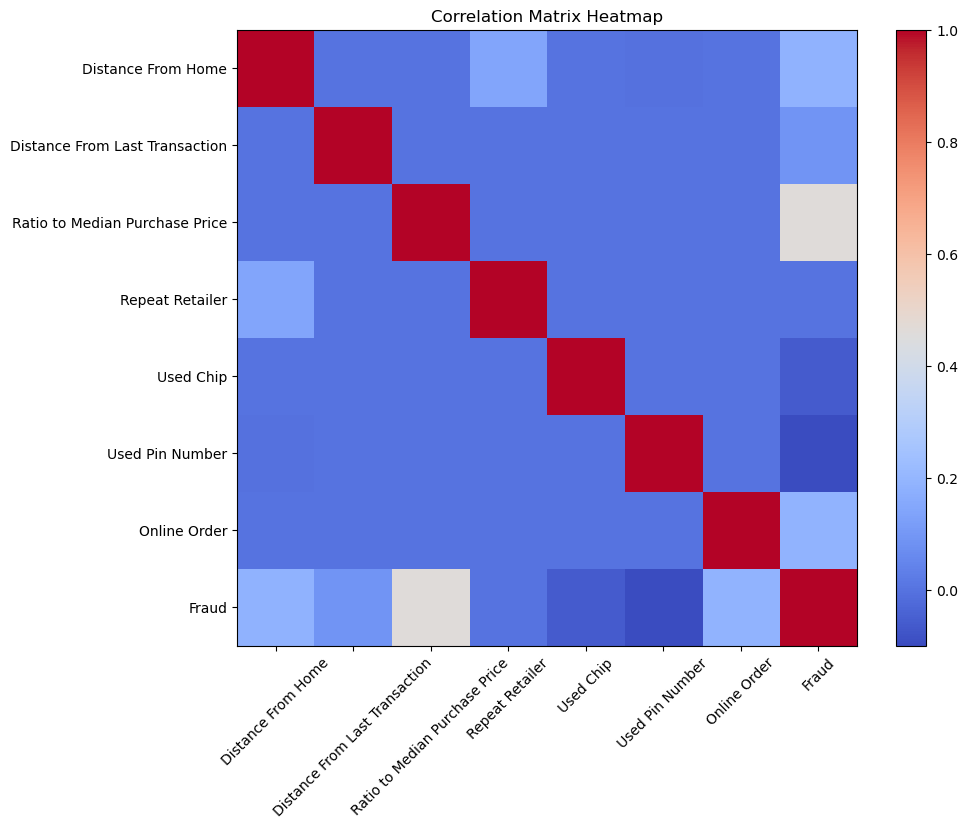

In [384]:
#Show correlation as a heatmap
matrix = df.corr()
plt.figure(figsize=(10, 8))
plt.imshow(matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(matrix.columns)), matrix.columns, rotation=45)
plt.yticks(range(len(matrix.index)), matrix.index)
plt.title('Correlation Matrix Heatmap')
plt.show()

Based off the correlation head map I can already identify correlation between: Distance from last transaction and Fraud.
This correlation needs to be further explored.



In [385]:

df.describe()


,Distance From Home,Distance From Last Transaction,Ratio to Median Purchase Price,Repeat Retailer,Used Chip,Used Pin Number,Online Order,Fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628788,5.036518,1.824176,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390788,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.880000,0.300000,0.480000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.970000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.740000,3.360000,2.100000,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.720000,11851.100000,267.800000,1.000000,1.000000,1.000000,1.000000,1.000000


In [386]:
#set up IQR range
Q1 = df['Distance From Last Transaction'].quantile(0.25)
Q3 = df['Distance From Last Transaction'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df[(df['Distance From Last Transaction'] < Q1 - threshold * IQR) | (df['Distance From Last Transaction'] > Q3 + threshold * IQR)]
outliers.describe()

,Distance From Home,Distance From Last Transaction,Ratio to Median Purchase Price,Repeat Retailer,Used Chip,Used Pin Number,Online Order,Fraud
count,124360.000000,124360.000000,124360.000000,124360.000000,124360.000000,124360.000000,124360.000000,124360.000000
mean,26.698279,30.007471,1.827559,0.881304,0.350209,0.101078,0.650941,0.128385
std,65.871202,68.091274,2.774299,0.323431,0.477037,0.301433,0.476675,0.334520
min,0.030000,7.950000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.890000,10.730000,0.470000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.030000,15.790000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.810000,28.470000,2.100000,1.000000,1.000000,0.000000,1.000000,0.000000
max,3981.370000,11851.100000,126.290000,1.000000,1.000000,1.000000,1.000000,1.000000


In [408]:
#Seperate data from fraud and not & distance of 80 due to outliers
distance_fraud_data = df[(df['Fraud'] == 1) & (df['Distance From Last Transaction'] < 80)]['Distance From Last Transaction']
distance_not_fraud_data = df[(df['Fraud'] == 0) & (df['Distance From Last Transaction'] < 80)]['Distance From Last Transaction']

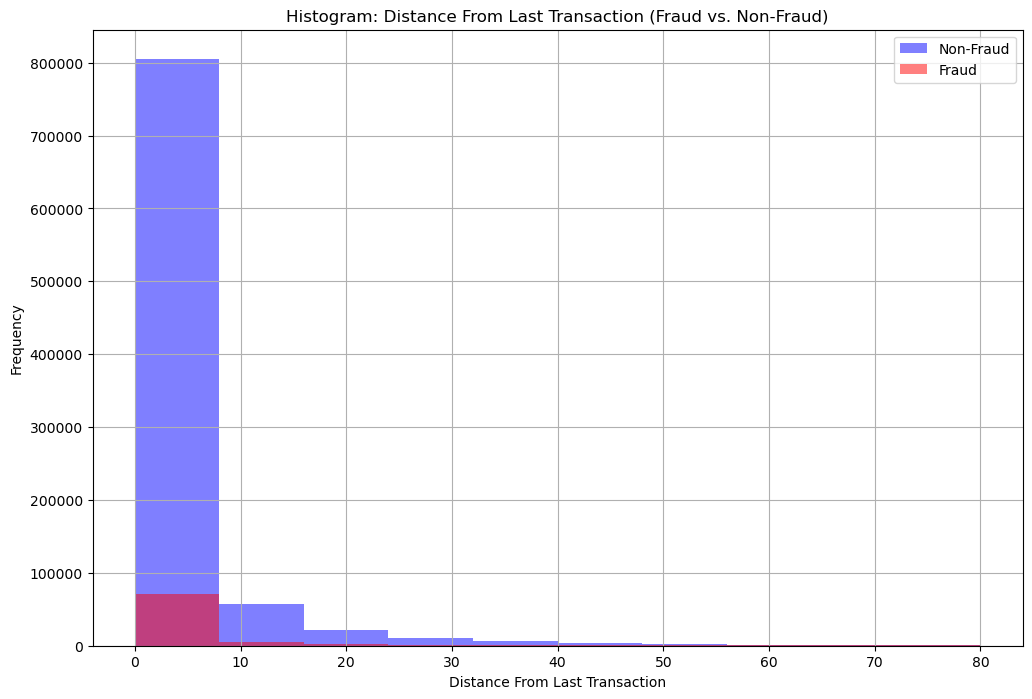

In [407]:
# Create a histogram   distance from last transaction
plt.figure(figsize=(12, 8))
plt.hist(distance_not_fraud_data, bins=10, alpha=0.5, label='Non-Fraud', color='blue')
plt.hist(distance_fraud_data, bins=10, alpha=0.5, label='Fraud', color='red')
plt.title('Histogram: Distance From Last Transaction (Fraud vs. Non-Fraud)')
plt.xlabel('Distance From Last Transaction')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()




In [389]:
#find mean of distances

not_fraud_mean = (distance_not_fraud_data.mean())
fraud_mean = (distance_fraud_data.mean())
 
print(f" Mean distance for fraud transactions: {fraud_mean}")
print(f" Mean distance for non fraud transactions: {not_fraud_mean}")


 Mean distance for fraud transactions: 5.7567519358572055
 Mean distance for non fraud transactions: 3.5534477852384425


## On average fraudulent transactions are further away from the last transaction than non-fraudulent transactions


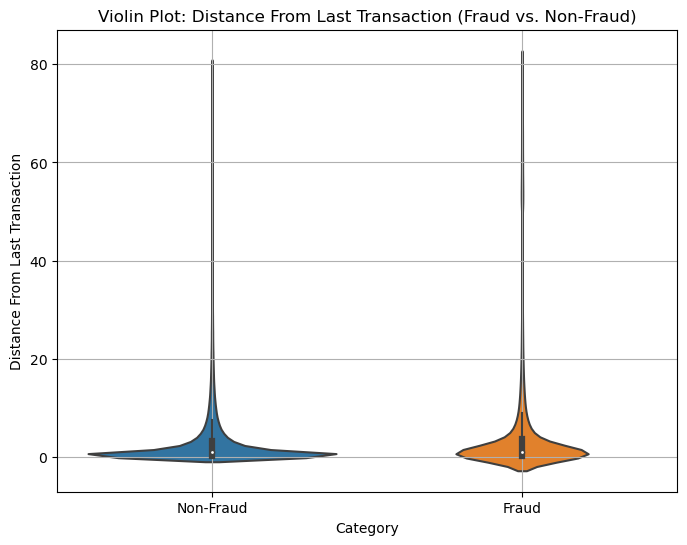

In [390]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.violinplot(data=[distance_not_fraud_data , distance_fraud_data ])
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.title('Violin Plot: Distance From Last Transaction (Fraud vs. Non-Fraud)')
plt.xlabel('Category')
plt.ylabel('Distance From Last Transaction')
plt.grid(True)
plt.show()

In [391]:
#Seperate data
fraud_data = df[df['Fraud'] == 1]
not_fraud_data = df[df['Fraud'] == 0]


In [392]:
#Sample 1000 of both transactions
fraud_sample = fraud_data.sample(n=1000,random_state=50)
not_fraud_sample = not_fraud_data.sample(n=1000,random_state=50)

In [393]:
#verify samples
display(fraud_sample.count())
display(not_fraud_sample.count())

Distance From Home                1000
Distance From Last Transaction    1000
Ratio to Median Purchase Price    1000
Repeat Retailer                   1000
Used Chip                         1000
Used Pin Number                   1000
Online Order                      1000
Fraud                             1000
dtype: int64

Distance From Home                1000
Distance From Last Transaction    1000
Ratio to Median Purchase Price    1000
Repeat Retailer                   1000
Used Chip                         1000
Used Pin Number                   1000
Online Order                      1000
Fraud                             1000
dtype: int64

In [394]:
#display new df 
fraud_data.head(10)

,Distance From Home,Distance From Last Transaction,Ratio to Median Purchase Price,Repeat Retailer,Used Chip,Used Pin Number,Online Order,Fraud
13,2.13,56.37,6.36,1,0,0,1,1
24,3.80,67.24,1.87,1,0,0,1,1
29,15.69,175.99,0.86,1,0,0,1,1
35,26.71,1.55,4.60,1,1,0,1,1
36,10.66,1.57,4.89,1,0,0,1,1
47,2.53,3.69,8.30,1,0,0,1,1
48,21.13,0.27,6.08,1,0,0,1,1
54,151.37,5.34,1.17,1,0,0,1,1
101,9.60,0.45,6.08,1,0,0,1,1
104,22.55,0.35,4.10,1,0,0,1,1


## TTESTS

## Find Statistical significance   using ttest

In [395]:
#perform ttest on small sample of  Distance From Last Transaction data
print(ttest_ind(fraud_sample['Distance From Last Transaction'], not_fraud_sample['Distance From Last Transaction'], equal_var=False))

TtestResult(statistic=6.033861470833046, pvalue=2.0678058689589185e-09, df=1341.160025404163)


In [396]:
#perform ttest on all Distance From Last Transaction data
print(ttest_ind(fraud_data['Distance From Last Transaction'], not_fraud_data['Distance From Last Transaction'], equal_var=False))


TtestResult(statistic=51.27055269402741, pvalue=0.0, df=91106.58538589293)


## With the small sample and the total data null hypothesis is rejected, there is a strong Statistical significance  

## Mann-Whitney U Test

In [397]:
u_stat, p_value = mannwhitneyu(fraud_sample['Distance From Last Transaction'], not_fraud_sample['Distance From Last Transaction'])
print("U statistic:", u_stat)
print("p-value:", p_value)

U statistic: 541838.0
p-value: 0.0011954962252444547


In [398]:
#create distance ratio
df['Distance From Home'].replace(0, 1e-10, inplace=True)
df['Distance Ratio'] = df['Distance From Last Transaction'] / df['Distance From Home']




In [399]:
#display dataframe
df.head(40)



,Distance From Home,Distance From Last Transaction,Ratio to Median Purchase Price,Repeat Retailer,Used Chip,Used Pin Number,Online Order,Fraud,Distance Ratio
0,57.88,0.31,1.95,1,1,0,0,0,0.005356
1,10.83,0.18,1.29,1,0,0,0,0,0.016620
2,5.09,0.81,0.43,1,0,0,1,0,0.159136
3,2.25,5.60,0.36,1,1,0,1,0,2.488889
4,44.19,0.57,2.22,1,1,0,1,0,0.012899
5,5.59,13.26,0.06,1,0,0,0,0,2.372093
6,3.72,0.96,0.28,1,0,0,1,0,0.258065
7,4.85,0.32,1.27,1,0,1,0,0,0.065979
8,0.88,2.50,1.52,0,0,0,0,0,2.840909
9,8.84,2.97,2.36,1,0,0,1,0,0.335973


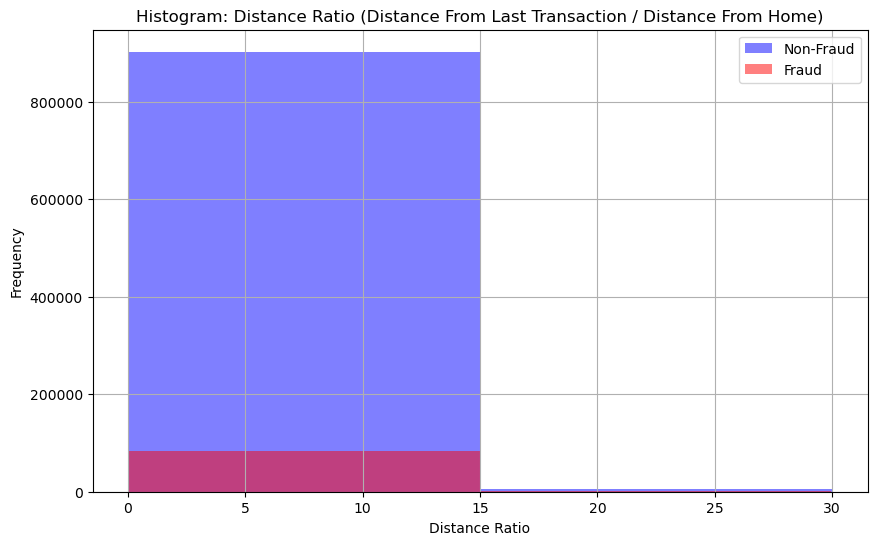

Summary Statistics for Distance Ratio by Fraud:


,count,mean,std,min,25%,50%,75%,max
Fraud,,,,,,,,
0,912597.0,2192.672809,2.093584e+06,0.0,0.022698,0.102712,0.464706,2.000000e+09
1,87403.0,3.646751,3.069527e+01,0.0,0.010633,0.069791,0.502806,2.531143e+03


'Correlation between Distance Ratio and Fraud: -0.00'

In [400]:
# Separate the data into fraud and non-fraud
fraud = df[(df['Fraud'] == 1) & (df['Distance Ratio'] < 30)]
non_fraud = df[(df['Fraud'] == 0) & (df['Distance Ratio'] < 30)]

# Create histograms to compare the ratio distributions
plt.figure(figsize=(10, 6))
plt.hist(non_fraud['Distance Ratio'], bins=2, alpha=0.5, label='Non-Fraud', color='blue')
plt.hist(fraud['Distance Ratio'], bins=2, alpha=0.5, label='Fraud', color='red')
plt.title('Histogram: Distance Ratio (Distance From Last Transaction / Distance From Home)')
plt.xlabel('Distance Ratio')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()



# Calculate summary statistics for the distance ratio
summary_stats = df.groupby('Fraud')['Distance Ratio'].describe()
print("Summary Statistics for Distance Ratio by Fraud:")
display(summary_stats)

# Calculate the correlation between Distance Ratio and Fraud
correlation = df['Distance Ratio'].corr(df['Fraud'])
display(f"Correlation between Distance Ratio and Fraud: {correlation:.2f}")

<Figure size 800x600 with 0 Axes>

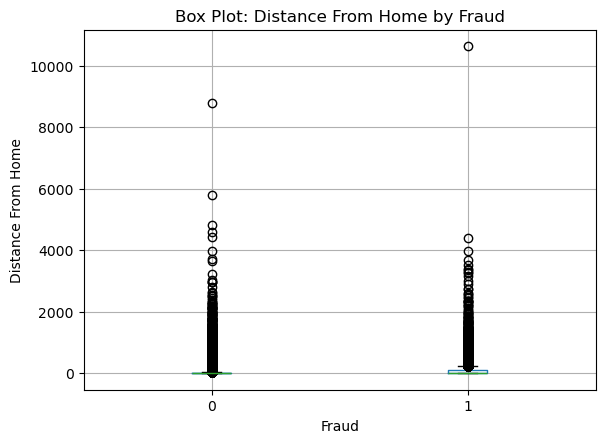

In [401]:
#Show distance from home and fruad
plt.figure(figsize=(8, 6))
df.boxplot(column='Distance From Home', by='Fraud')
plt.title('Box Plot: Distance From Home by Fraud')
plt.suptitle('')
plt.xlabel('Fraud')
plt.ylabel('Distance From Home')
plt.grid(True)
plt.show()
